In [2]:
import keras
from keras import layers
from keras.datasets import mnist
import matplotlib.pyplot as plt
 # 创建模型（我们将其包装为一个单独的函数，以便后续复用）
def get_mnist_model(): 
    inputs = keras.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation="relu")(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation="softmax")(features)
    model = keras.Model(inputs, outputs)
    return model

(images, labels), (test_images, test_labels) = mnist.load_data()

# plt.imshow(test_images,  cmap='viridis')
# plt.show()

# ←----加载数据，保留一部分数据用于验证
images = images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]


model = get_mnist_model()
  # ←---- (本行及以下2行)编译模型，指定模型的优化器、需要最小化的损失函数和需要监控的指标
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

tensorboard = keras.callbacks.TensorBoard(log_dir="logs_stand_solution")
  # ←---- (本行及以下2行)使用fit()训练模型，可以选择提供验证数据来监控模型在前所未见的数据上的性能
model.fit(train_images, train_labels,
          epochs=30,
          validation_data=(val_images, val_labels),
          callbacks=[tensorboard]
         )

  # ←----使用evaluate()计算模型在新数据上的损失和指标
test_metrics = model.evaluate(test_images, test_labels)

  # ←----使用predict()计算模型在新数据上的分类概率
predictions = model.predict(test_images)

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8649 - loss: 0.4442 - val_accuracy: 0.9579 - val_loss: 0.1426
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9516 - loss: 0.1668 - val_accuracy: 0.9632 - val_loss: 0.1317
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9624 - loss: 0.1301 - val_accuracy: 0.9732 - val_loss: 0.1024
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9679 - loss: 0.1107 - val_accuracy: 0.9759 - val_loss: 0.0968
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9707 - loss: 0.1071 - val_accuracy: 0.9748 - val_loss: 0.1021
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9760 - loss: 0.0860 - val_accuracy: 0.9773 - val_loss: 0.0857
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9766 - loss: 0.0826 - val_accuracy: 0.9783 - val_loss: 0.0909
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9783 - loss: 0.0

In [9]:
predictions.shape
predictions[0].argmax()

7

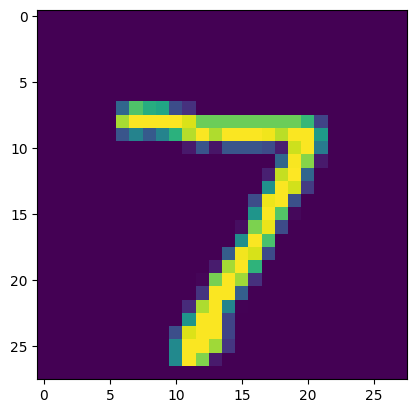

In [16]:
test_images.shape
result =test_images[0].reshape(28, 28)
result.shape
plt.imshow(result,  cmap='viridis')
plt.show()